# Mrunal Aroskar

In [2]:
import pandas as pd

df = pd.read_csv('/Users/FIFA-21 Complete.csv' , delimiter = ';')
df

,player_id,name,nationality,position,overall,age,hits,potential,team
0,158023,Lionel Messi,Argentina,ST|CF|RW,94,33,299,94,FC Barcelona
1,20801,Cristiano Ronaldo,Portugal,ST|LW,93,35,276,93,Juventus
2,190871,Neymar Jr,Brazil,CAM|LW,92,28,186,92,Paris Saint-Germain
3,203376,Virgil van Dijk,Netherlands,CB,91,29,127,92,Liverpool
4,200389,Jan Oblak,Slovenia,GK,91,27,47,93,Atlético Madrid
...,...,...,...,...,...,...,...,...,...
17976,256093,Jaime Ortíz,Ecuador,ST,56,21,0,64,Sociedad Deportiva Aucas
17977,256088,Michael Carcelén,Ecuador,CM,56,23,0,64,Club Deportivo El Nacional
17978,256074,Davide Luzi,Venezuela,ST,56,18,1,68,Zamora Fútbol Club
17979,256073,Sergio Sulbarán,Venezuela,RW,56,22,0,62,Zamora Fútbol Club


## Research question/interests

-What factors affect the players' potential in the upcoming matches?

-Does the age factor affect the overall rating of the players?

## MILESTONE 3

### EDA:

-Here, I will be superficially exploring my dataset.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
print("Number of rows and columns in the dataset respectively: ", df.shape)
print("Headings of the coulmns in the dataset: ", df.columns)
df.info()

Number of rows and columns in the dataset respectively:  (17981, 9)
Headings of the coulmns in the dataset:  Index(['player_id', 'name', 'nationality', 'position', 'overall', 'age',
       'hits', 'potential', 'team'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   player_id    17981 non-null  int64 
 1   name         17981 non-null  object
 2   nationality  17981 non-null  object
 3   position     17981 non-null  object
 4   overall      17981 non-null  int64 
 5   age          17981 non-null  int64 
 6   hits         17981 non-null  int64 
 7   potential    17981 non-null  int64 
 8   team         17981 non-null  object
dtypes: int64(5), object(4)
memory usage: 1.2+ MB


In [13]:
print("Numerical Data:")
df.describe().T

Numerical Data:


,count,mean,std,min,25%,50%,75%,max
player_id,17981.0,220912.660531,27738.072671,41.0,204881.0,226753.0,241587.0,256469.0
overall,17981.0,67.274345,5.924392,56.0,63.0,67.0,71.0,94.0
age,17981.0,26.311440,4.556077,17.0,23.0,26.0,30.0,43.0
hits,17981.0,2.689450,10.846286,0.0,0.0,0.0,2.0,371.0
potential,17981.0,71.738057,5.961968,57.0,67.0,71.0,76.0,95.0


In [15]:
print("Number of unique values for each variable:")
df.nunique(axis=0)

Number of unique values for each variable:


,player_id,overall,age,hits,potential
count,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000
mean,220912.660531,67.274345,26.311440,2.689450,71.738057
std,27738.072671,5.924392,4.556077,10.846286,5.961968
min,41.000000,56.000000,17.000000,0.000000,57.000000
25%,204881.000000,63.000000,23.000000,0.000000,67.000000
50%,226753.000000,67.000000,26.000000,0.000000,71.000000
75%,241587.000000,71.000000,30.000000,2.000000,76.000000
max,256469.000000,94.000000,43.000000,371.000000,95.000000


In [20]:
df.describe(include='object').T

,count,unique,top,freq
name,17981,17701,Paulinho,8
nationality,17981,162,England,1496
position,17981,232,CB,2296
team,17981,713,Free Agents,211


A lot of players have zero hits


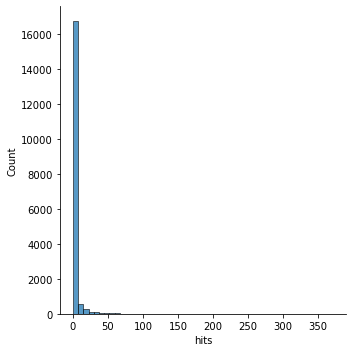

In [44]:
print("A lot of players have zero hits")
sns.displot(df['hits'], kde=False, bins=50)

In [39]:
print("There is no null data in this dataset")
print(df.isnull().sum())

There is no null data in this dataset
player_id      0
name           0
nationality    0
position       0
overall        0
age            0
hits           0
potential      0
team           0
dtype: int64


Average potential is quite good


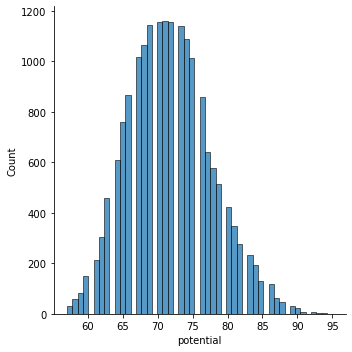

In [45]:
print("Average potential is quite good")
sns.displot(df['potential'], kde=False, bins=50)

There are an abundant amount of people with minimum hits but average potential


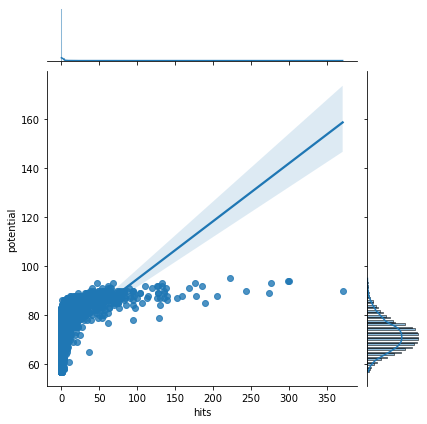

In [49]:
print("There are an abundant amount of people with minimum hits but average potential")
sns.jointplot(x='hits', y='potential', data=df, kind='reg')